# About Dataset

**Age :** the age of the person

**Occupation :** the occupation of the person

**Annual_Income :** the annual income of the person

**Num_Bank_Accounts :** the number of bank accounts a person holds

**Num_Credit_Card :** the number of other credit cards held by a person

**Interest_Rate :** the interest rate on credit card

**Num_of_Loan :** the number of loans taken from the bank

**Delay_from_due_date :** the average number of days delayed from the payment date

**Num_of_Delayed_Payment :** the average number of payments delayed by a person

**Changed_Credit_Limit :** the percentage change in credit card limit

**Num_Credit_Inquiries :** the number of credit card inquiries

**Outstanding_Debt :** the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio :** the utilization ratio of credit card

**Credit_History_Age :** the age of credit history of the person

**Payment_of_Min_Amount :** whether only the minimum amount was paid by the person

**Total_EMI_per_month :** the monthly EMI payments (in USD)

**Amount_invested_monthly :** the monthly amount invested by the customer (in USD)

**Monthly_Balance :** the monthly balance amount of the customer (in USD)

**Credit_Score :** the bracket of credit score (Poor, Standard, Good)

# Import Libraries

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv("/content/drive/MyDrive/ML_Machine-Learning/credit_score_without_dummy.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98288 entries, 0 to 98287
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98288 non-null  int64  
 1   Occupation                98288 non-null  object 
 2   Annual_Income             98288 non-null  float64
 3   Num_Bank_Accounts         98288 non-null  float64
 4   Num_Credit_Card           98288 non-null  float64
 5   Interest_Rate             98288 non-null  float64
 6   Num_of_Loan               98288 non-null  float64
 7   Delay_from_due_date       98288 non-null  int64  
 8   Num_of_Delayed_Payment    98288 non-null  float64
 9   Changed_Credit_Limit      98288 non-null  float64
 10  Num_Credit_Inquiries      98288 non-null  float64
 11  Outstanding_Debt          98288 non-null  float64
 12  Credit_Utilization_Ratio  98288 non-null  float64
 13  Credit_History_Age        98288 non-null  int64  
 14  Paymen

In [ ]:
# test = pd.read_csv("test_without_dummy.csv")

In [ ]:
# test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48195 entries, 0 to 48194
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       48195 non-null  int64  
 1   Occupation                48195 non-null  object 
 2   Annual_Income             48195 non-null  float64
 3   Num_Bank_Accounts         48195 non-null  float64
 4   Num_Credit_Card           48195 non-null  float64
 5   Interest_Rate             48195 non-null  float64
 6   Num_of_Loan               48195 non-null  float64
 7   Delay_from_due_date       48195 non-null  int64  
 8   Num_of_Delayed_Payment    48195 non-null  float64
 9   Changed_Credit_Limit      48195 non-null  float64
 10  Num_Credit_Inquiries      48195 non-null  float64
 11  Outstanding_Debt          48195 non-null  float64
 12  Credit_Utilization_Ratio  48195 non-null  float64
 13  Credit_History_Age        48195 non-null  int64  
 14  Paymen

In [ ]:
train1 = train[['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Score']]
sns.pairplot(train1, hue="Credit_Score")
plt.show()

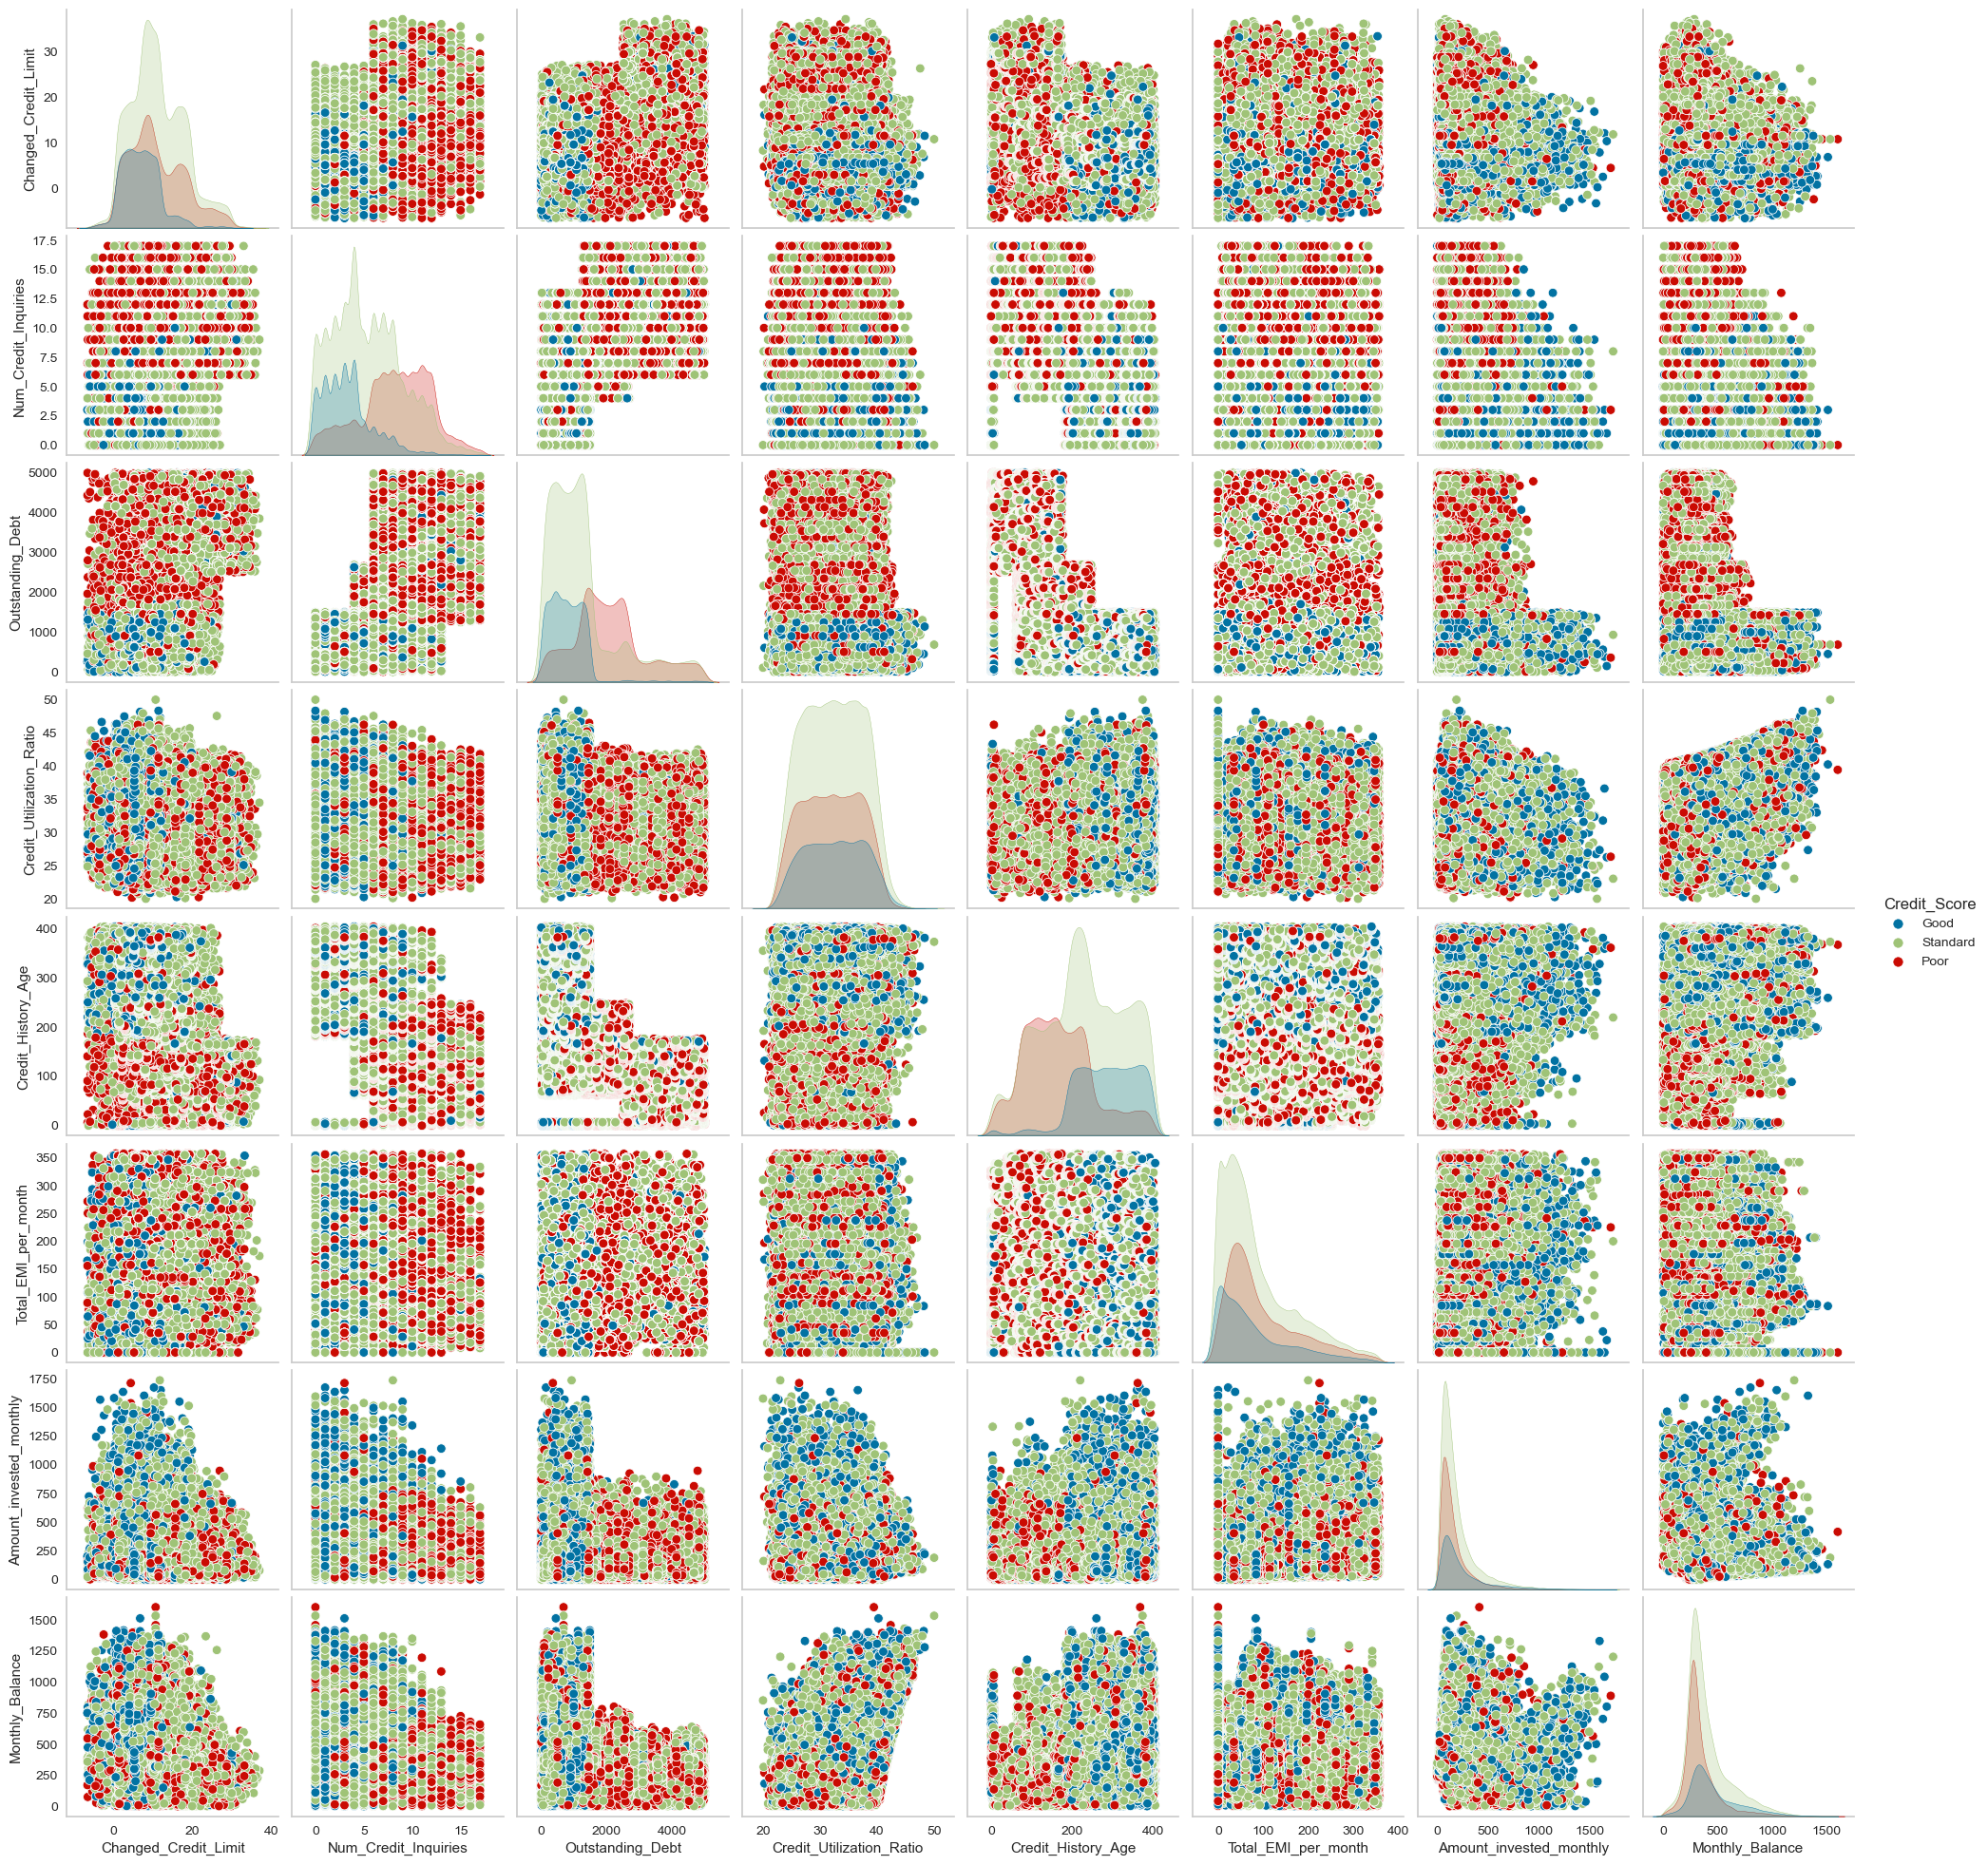

In [ ]:
train2 = train[['Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]
sns.pairplot(train2, hue="Credit_Score")
plt.show()

In [ ]:
train.Credit_Score.value_counts()

Standard    52509
Poor        28723
Good        17056
Name: Credit_Score, dtype: int64

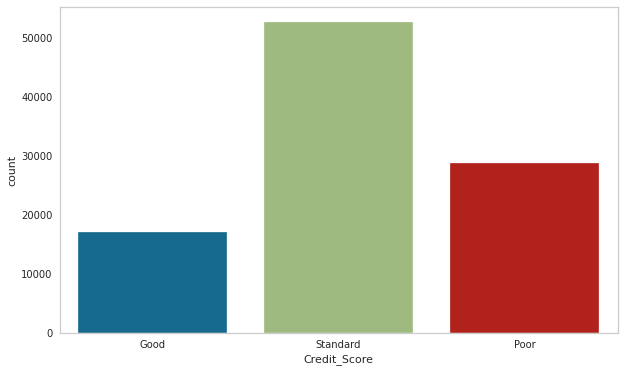

In [ ]:
sns.countplot(train["Credit_Score"]);

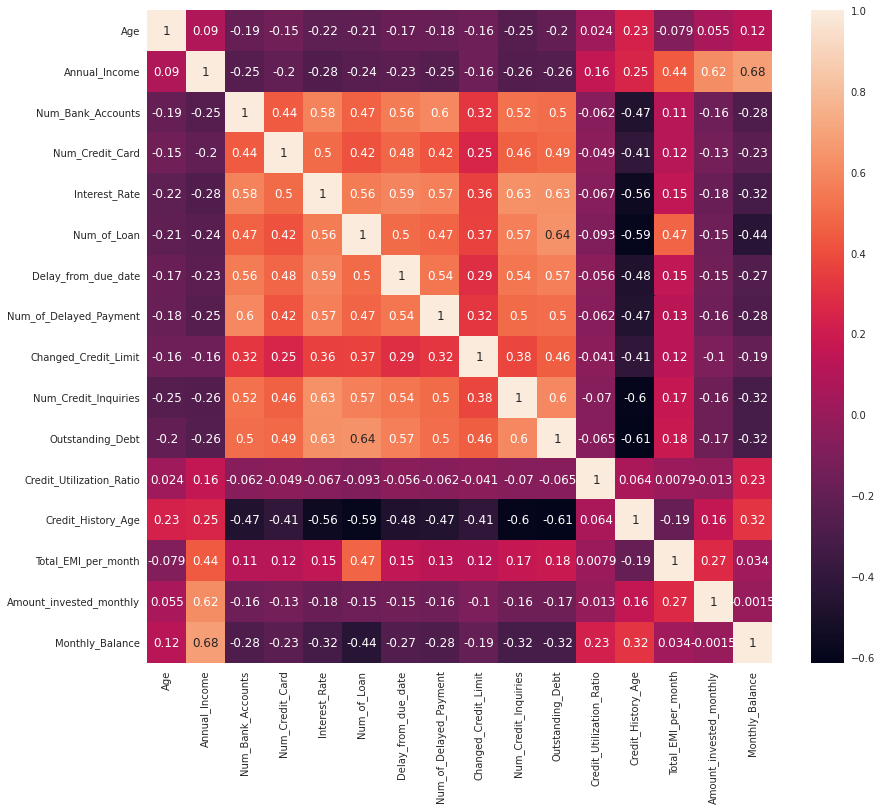

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Data Preprocessing

In [6]:
X = train.drop("Credit_Score",axis=1)
y = train.Credit_Score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

# Implement Machine Learning Models

In [8]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

## Ensemble Model (Bagging Classifier)

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [10]:
# grab categorical columns' names for further analysis

cat = X.select_dtypes("object").columns
cat

Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object')

In [12]:
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough') 

In [13]:
# building a pipe model for Bagging Classifier

operations = [("OrdEncoder", column_trans), ("bagging_model", BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                                                                                   n_estimators=10, random_state=42))]

bag_pipe_model = Pipeline(steps=operations)

In [ ]:
# fit the Bagging Classifier model on train data

bag_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('bagging_model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

        Good       0.75      0.77      0.76      3411
        Poor       0.77      0.84      0.80      5745
    Standard       0.83      0.79      0.81     10502

    accuracy                           0.80     19658
   macro avg       0.79      0.80      0.79     19658
weighted avg       0.80      0.80      0.80     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       0.98      0.99      0.98     13645
        Poor       0.98      0.99      0.98     22978
    Standard       0.99      0.98      0.99     42007

    accuracy                           0.99     78630
   macro avg       0.98      0.99      0.99     78630
weighted avg       0.99      0.99      0.99     78630



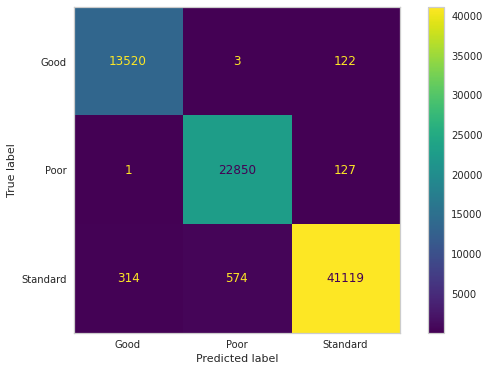

In [ ]:
# check the evaluation metrics of logistic model

eval_metric(bag_pipe_model, X_train, y_train, X_test, y_test)

 ## Define Scoring to determine Poor Credit Score correctly

In [14]:
scoring = {"f1_Poor" : make_scorer(f1_score, average = None, labels =["Poor"]),
           "precision_Poor" : make_scorer(precision_score, average = None, labels =["Poor"]),
           "recall_Poor" : make_scorer(recall_score, average = None, labels =["Poor"])}

### Bagging Classifier Model Cross Validation

In [ ]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Poor          0.80
test_precision_Poor   0.77
test_recall_Poor      0.83
dtype: float64

###  Bagging Classifier Model GridsearchCV

In [ ]:
# Defining gridsearch scoring parameter to maximize recall values of Poor Credit Score

recall_Poor =  make_scorer(recall_score, average=None, labels=["Poor"])

In [ ]:
# reset the model
model = Pipeline(operations)

# defining the grid parameter

param_grid = {
    'bagging_model__bootstrap': [True, False],
    'bagging_model__bootstrap_features': [True, False],
    'bagging_model__n_estimators': [10, 20, 30],
    'bagging_model__max_samples' : [0.5, 0.6, 0.8],
    'bagging_model__base_estimator__max_depth' : [10, 12, 14]
}

# build Bagging grid model
bag_grid_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Poor, cv=5, n_jobs=-1)

In [ ]:
# fit grid model on train data

bag_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                                       ('bagging_model',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'bagging_model__base_estimator__max_depth': [10, 12,
                                         

In [ ]:
bag_grid_model.best_params_

{'bagging_model__base_estimator__max_depth': 14,
 'bagging_model__bootstrap': False,
 'bagging_model__bootstrap_features': True,
 'bagging_model__max_samples': 0.8,
 'bagging_model__n_estimators': 20}

In [ ]:
bag_grid_model.best_score_

0.7558099440209636

TEST REPORT
              precision    recall  f1-score   support

        Good       0.70      0.63      0.66      3411
        Poor       0.78      0.76      0.77      5745
    Standard       0.77      0.81      0.79     10502

    accuracy                           0.76     19658
   macro avg       0.75      0.73      0.74     19658
weighted avg       0.76      0.76      0.76     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       0.80      0.73      0.76     13645
        Poor       0.87      0.83      0.85     22978
    Standard       0.84      0.89      0.86     42007

    accuracy                           0.84     78630
   macro avg       0.84      0.81      0.82     78630
weighted avg       0.84      0.84      0.84     78630



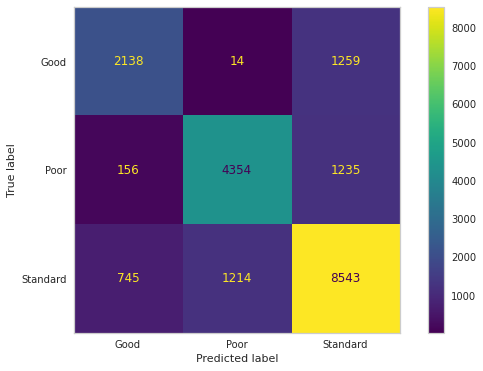

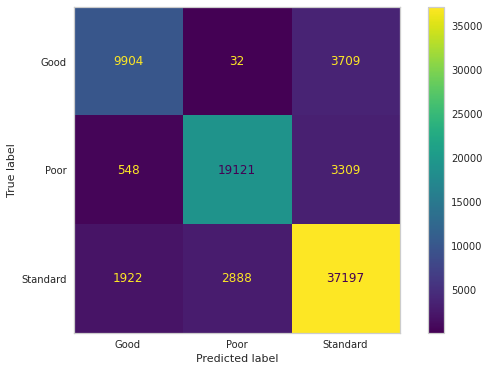

In [ ]:
# checking the evaluation metrics of grid model

eval_metric(bag_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

In [ ]:
# precision-recall curve for Logistic grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = bag_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Good", "Poor", "Standard"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();